# Clustering with DBSCAN

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

from sklearn import datasets
from sklearn import cluster
from sklearn import manifold

In [15]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Reduce the dataset to 2-dimension with MDS for better visualization

In [16]:
mds = manifold.MDS(n_components=2)
new_dim = mds.fit_transform(iris.data)
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df.head()

,X,Y
0,-1.688912,-2.128041
1,-2.088390,-1.765564
2,-2.161322,-1.945411
3,-2.197459,-1.695071
4,-1.703672,-2.181887


Clustering with 2 clusters

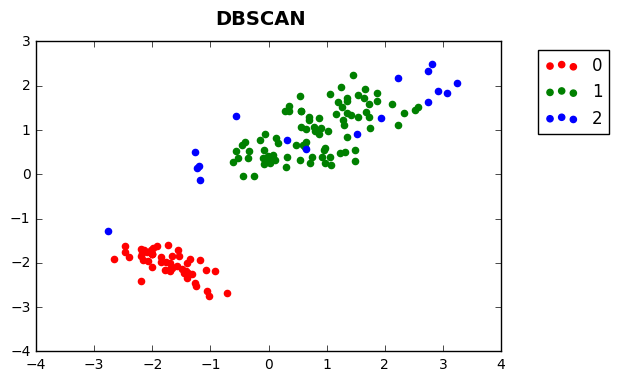

In [17]:
dbscan = cluster.DBSCAN()
label = dbscan.fit_predict(iris.data)
df['label'] = label

color = ['red','green','blue', 'yellow']

fig = plt.figure()
fig.suptitle('DBSCAN', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

clusters = list(set(label))

for i in range(len(clusters)):
    plt.scatter(df[df.label == clusters[i]].X, df[df.label == clusters[i]].Y, label=i, color=color[i])
    
plt.legend(bbox_to_anchor=(1.25, 1))